In [37]:
import pandas as pd
chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

import TMQGP as tm
import QuarkTM

import matplotlib
matplotlib.style.use('publication')
import os

import h5py

from numpy import *

In [30]:
fname1 = './4ch_noexpand/170/iter_0.hdf5'
fname2 = './old_HI/0.00/170/iter_0.hdf5'

In [31]:
df1 = h5py.File(fname1)
df2 = h5py.File(fname2)

In [32]:
erange = linspace(-5, 5, 201)
erange2b = linspace(0, 10, 1501)

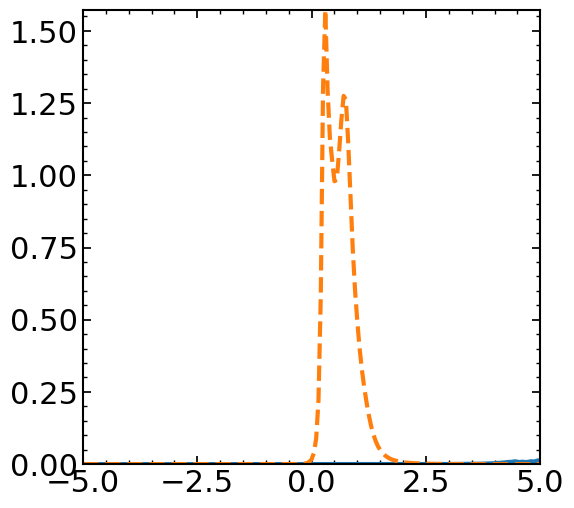

In [33]:
plt.plot(erange, -1/pi*imag(df1['Q']['G'][:, 0]))
plt.plot(erange, -1/pi*imag(df2['Q']['G'][:, 0]), ls='--')


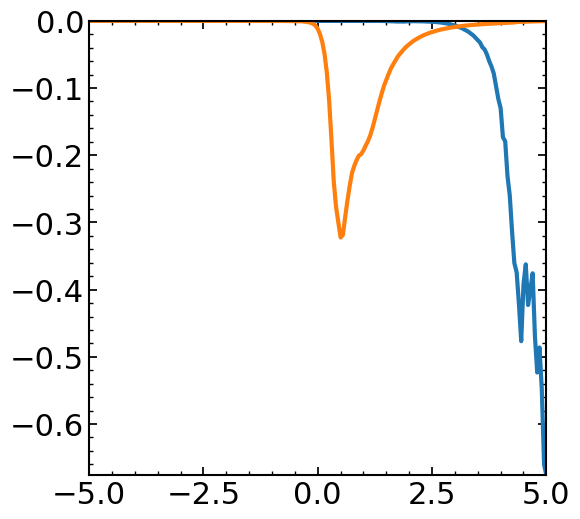

In [34]:
plt.plot(erange, imag(df1['Q']['S'][:, 0]))
plt.plot(erange, imag(df2['Q']['S'][:, 0]))


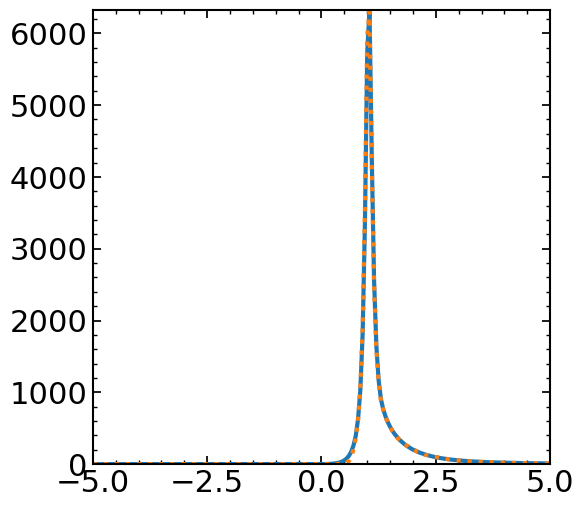

In [36]:
plt.plot(erange, -imag(df1['TM']['qa1']['0'][:, 0]))
plt.plot(erange, -imag(df2['TM']['qa1']['0'][:, 0]), ls=':')
# plt.plot(erange, imag(df2['Q']['S'][:, 0]))

# plt.semilogy()